# Sistemas de recomendação com Python


Neste notebook nos concentraremos em fornecer um sistema de recomendação básico, sugerindo itens que são mais parecidos com um item específico, neste caso, filmes. Tenha em mente que este não é um verdadeiro sistema de recomendação robusto, para descrevê-lo com mais precisão, apenas diz o que os filmes / itens são mais parecidos com a escolha do seu filme.

Não há nenhum projeto para este tópico, em vez disso você tem a opção de trabalhar com a versão de conferência avançada deste notebook (totalmente opcional!).

Vamos começar!

## Importar bibliotecas

In [3]:
import numpy as np
import pandas as pd

## Obter os dados

In [40]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [41]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Agora vamos receber os títulos do filme:

In [42]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Podemos juntá-los:

In [43]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# Análise exploratória de dados

Vamos explorar os dados um pouco e dê uma olhada em alguns dos filmes mais bem classificados.

## Visualização Importações

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Vamos criar um dataframes de ratings com classificação média e número de avaliações:

In [45]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [46]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [47]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Agora, defina a coluna de número de classificações:

In [48]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


E alguns histogramas:

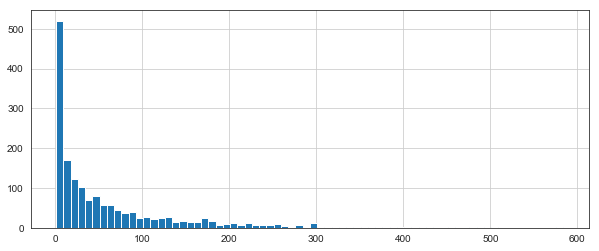

In [49]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

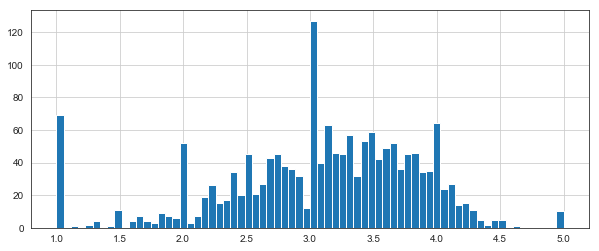

In [50]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

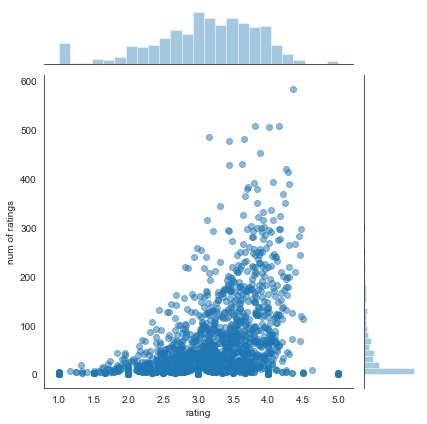

In [51]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

OK! Agora que temos uma idéia geral de como os dados se parecem, vamos passar para a criação de um sistema de recomendação simples:

## Recomendando filmes semelhantes

Agora vamos criar uma matriz que tenha o ID dos usuários em um acesso e o título do filme em outro eixo. Cada célula irá consistir na classificação que o usuário deu a esse filme. Observe que haverá muitos valores de NaN, porque a maioria das pessoas não viu a maioria dos filmes.

In [53]:
# creating a utility matrix
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filme mais avaliado:

In [55]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Vamos escolher dois filmes: starwars, um filme de ficção científica e Liar Liar, uma comédia.

In [56]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Agora vamos pegar as avaliações dos usuários para esses dois filmes:

In [57]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

Podemos então usar o método corrwith() para obter correlações entre duas séries de pandas:

In [23]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Vamos limpar isso removendo valores de NaN e usando um DataFrame em vez de uma série:

In [24]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Agora, se classificarmos o quadro de dados por correlação, devemos obter os filmes mais parecidos, no entanto, notemos que obtemos alguns resultados que realmente não fazem sentido. Isso ocorre porque há muitos filmes apenas assistidos uma vez por usuários que também assistiram a star wars (foi o filme mais popular).

In [25]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


Vamos corrigir isso, filtrando filmes com menos de 100 comentários (esse valor foi escolhido com base no histograma anterior).

In [26]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Agora, classifique os valores e observe como os títulos têm muito mais sentido:

In [27]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Agora o mesmo para Liar Liar:

In [28]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [29]:

ratings = pd.read_csv('movie_ratings.csv').set_index('Movie')

In [30]:
ratings

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Aquaman,4,1,2,2,2
Avengers: Infinity War,2,5,2,5,5
Black Panther,5,2,5,1,1
Bohemian Rhapsody,2,3,4,4,1
Deadpool 2,3,2,4,5,1
Fantastic Beasts: The Crimes of Grindelwald,5,4,1,2,5
Incredibles 2,4,2,3,4,4
Jurassic World: Fallen Kingdom,2,3,5,4,5
Mission: Impossible – Fallout,5,5,4,3,2


In [31]:
from scipy.spatial.distance import pdist, squareform

squareform(pdist(ratings.T, 'euclidean'))


array([[0.        , 6.63324958, 6.        , 7.41619849, 7.48331477],
       [6.63324958, 0.        , 6.92820323, 6.40312424, 5.09901951],
       [6.        , 6.92820323, 0.        , 5.56776436, 8.24621125],
       [7.41619849, 6.40312424, 5.56776436, 0.        , 6.70820393],
       [7.48331477, 5.09901951, 8.24621125, 6.70820393, 0.        ]])

In [32]:
distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'euclidean'))), 
                         index=ratings.columns, columns=ratings.columns)

distances

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


In [33]:
tom = {'Aquaman': 2,
 'Avengers: Infinity War': 1,
 'Black Panther': 5,
 'Bohemian Rhapsody': 5,
 'Deadpool 2': 2,
 'Fantastic Beasts: The Crimes of Grindelwald': 3,
 'Incredibles 2': 3,
 'Jurassic World: Fallen Kingdom': 4,
 'Mission: Impossible – Fallout': 3,
 'Venom': 3}

In [34]:
ratings['Tom'] = pd.Series(tom)

ratings

,Brandon,Emily,Cleo,Rusty,Samantha,Tom
Movie,,,,,,
Aquaman,4,1,2,2,2,2
Avengers: Infinity War,2,5,2,5,5,1
Black Panther,5,2,5,1,1,5
Bohemian Rhapsody,2,3,4,4,1,5
Deadpool 2,3,2,4,5,1,2
Fantastic Beasts: The Crimes of Grindelwald,5,4,1,2,5,3
Incredibles 2,4,2,3,4,4,3
Jurassic World: Fallen Kingdom,2,3,5,4,5,4
Mission: Impossible – Fallout,5,5,4,3,2,3


In [35]:
ratings['Tom'] = pd.Series(tom)

distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'euclidean'))), 
                         index=ratings.columns, columns=ratings.columns)

similarities = distances['Tom'].sort_values(ascending=False)[1:]
similarities

Cleo        0.217129
Brandon     0.156613
Emily       0.135078
Rusty       0.126132
Samantha    0.116961
Name: Tom, dtype: float64

In [36]:
new_ratings = pd.read_csv('movie_ratings2.csv').set_index('Movie')

In [37]:
new_ratings

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,2,5,2,5,2
Despicable Me 3,4,5,5,1,2
Guardians of the Galaxy Vol. 2,4,1,5,4,2
Jumanji: Welcome to the Jungle,4,3,3,2,5
Spider-Man: Homecoming,1,3,5,2,5
Star Wars: The Last Jedi,5,4,1,2,2
The Fate of the Furious,2,1,3,3,3
Thor: Ragnarok,4,3,4,1,5
Wolf Warrior 2,5,3,2,3,4


In [38]:
for name, score in dict(similarities).items():
    new_ratings[name] = new_ratings[name] * score

new_ratings['Total'] = new_ratings.sum(axis=1)
new_ratings.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Despicable Me 3,0.626452,0.675391,1.085646,0.126132,0.233923,2.747544
Wonder Woman,0.626452,0.405234,0.868517,0.378396,0.467845,2.746445
Thor: Ragnarok,0.626452,0.405234,0.868517,0.126132,0.584807,2.611142
Guardians of the Galaxy Vol. 2,0.626452,0.135078,1.085646,0.504528,0.233923,2.585627
Jumanji: Welcome to the Jungle,0.626452,0.405234,0.651388,0.252264,0.584807,2.520145
Spider-Man: Homecoming,0.156613,0.405234,1.085646,0.252264,0.584807,2.484564
Wolf Warrior 2,0.783065,0.405234,0.434259,0.378396,0.467845,2.468799
Beauty and the Beast,0.313226,0.675391,0.434259,0.630660,0.233923,2.287458
Star Wars: The Last Jedi,0.783065,0.540312,0.217129,0.252264,0.233923,2.026693


In [39]:
distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'cosine'))), 
                         index=ratings.columns, columns=ratings.columns)

similarities = distances['Tom'].sort_values(ascending=False)[1:]

recommendations = new_ratings.copy()

for name, score in dict(similarities).items():
    recommendations[name] = recommendations[name] * score
    
recommendations['Total'] = recommendations.sum(axis=1)
recommendations.sort_values('Total', ascending=False)


,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Despicable Me 3,0.566305,0.565364,1.034004,0.106469,0.185289,5.204975
Wonder Woman,0.566305,0.339218,0.827204,0.319408,0.370577,5.169157
Thor: Ragnarok,0.566305,0.339218,0.827204,0.106469,0.463222,4.913560
Guardians of the Galaxy Vol. 2,0.566305,0.113073,1.034004,0.425878,0.185289,4.910176
Jumanji: Welcome to the Jungle,0.566305,0.339218,0.620403,0.212939,0.463222,4.722231
Spider-Man: Homecoming,0.141576,0.339218,1.034004,0.212939,0.463222,4.675524
Wolf Warrior 2,0.707881,0.339218,0.413602,0.319408,0.370577,4.619486
Beauty and the Beast,0.283153,0.565364,0.413602,0.532347,0.185289,4.267211
Star Wars: The Last Jedi,0.707881,0.452291,0.206801,0.212939,0.185289,3.791894
